In [ ]:
import os
import tensorflow as tf
import zipfile

In [ ]:
local_zip = '/content/archive.zip'
with zipfile.ZipFile(local_zip, 'r') as zip_hand:
    zip_hand.extractall('/content')

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
input_folder = '/content/tire-dataset'
splitfolders.ratio(input_folder, output='dataset',
                   seed = 123, ratio=(.8,.2))

Copying files: 900 files [00:00, 9784.00 files/s]


In [ ]:
train_dir = os.listdir('/content/dataset/train/flat.class')
test_dir = os.listdir('/content/dataset/val/flat.class')
print('train_img:',len(train_dir),'test_img:',len(test_dir))

train_img: 240 test_img: 60


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/dataset/train',
    image_size=(240, 240),
    seed=123,
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/dataset/val',
    image_size=(240, 240),
    seed=123,
)

Found 720 files belonging to 3 classes.
Found 180 files belonging to 3 classes.


#MODELO 1

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (240,240,3)),
    tf.keras.layers.Dense(128, activation = 'relu'),  
    tf.keras.layers.Dense(64, activation = 'relu'), 
    tf.keras.layers.Dense(3), 
]) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 172800)            0         
                                                                 
 dense (Dense)               (None, 128)               22118528  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 22,126,979
Trainable params: 22,126,979
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=20,
    validation_data=test_ds
)

Epoch 1/20
23/23 [==============================] - 3s 46ms/step - loss: 4229.3633 - accuracy: 0.5542 - val_loss: 687.1299 - val_accuracy: 0.6333
Epoch 2/20
23/23 [==============================] - 1s 34ms/step - loss: 244.9912 - accuracy: 0.8014 - val_loss: 290.4611 - val_accuracy: 0.8056
Epoch 3/20
23/23 [==============================] - 1s 35ms/step - loss: 87.5351 - accuracy: 0.9014 - val_loss: 62.0749 - val_accuracy: 0.9389
Epoch 4/20
23/23 [==============================] - 1s 33ms/step - loss: 14.2624 - accuracy: 0.9667 - val_loss: 35.7342 - val_accuracy: 0.9722
Epoch 5/20
23/23 [==============================] - 1s 33ms/step - loss: 10.5883 - accuracy: 0.9792 - val_loss: 58.2390 - val_accuracy: 0.9500
Epoch 6/20
23/23 [==============================] - 1s 33ms/step - loss: 8.1843 - accuracy: 0.9889 - val_loss: 40.0813 - val_accuracy: 0.9222
Epoch 7/20
23/23 [==============================] - 1s 34ms/step - loss: 20.0690 - accuracy: 0.9486 - val_loss: 233.4043 - val_accuracy: 0

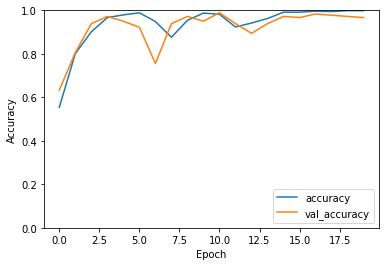

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

#SEGUNDO MODELO

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (240,240,3)),
    tf.keras.layers.Dense(128, activation = 'relu'),  
    tf.keras.layers.Dense(64, activation = 'relu'), 
    tf.keras.layers.Dense(3), 
]) 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 172800)            0         
                                                                 
 dense_9 (Dense)             (None, 128)               22118528  
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 3)                 195       
                                                                 
Total params: 22,126,979
Trainable params: 22,126,979
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=5,
    validation_data=test_ds
)

Epoch 1/5
23/23 [==============================] - 5s 185ms/step - loss: 8154.6089 - accuracy: 0.4903 - val_loss: 2356.1667 - val_accuracy: 0.6278
Epoch 2/5
23/23 [==============================] - 4s 178ms/step - loss: 759.3351 - accuracy: 0.7528 - val_loss: 328.1586 - val_accuracy: 0.8222
Epoch 3/5
23/23 [==============================] - 4s 181ms/step - loss: 392.0427 - accuracy: 0.8111 - val_loss: 97.4716 - val_accuracy: 0.9278
Epoch 4/5
23/23 [==============================] - 4s 181ms/step - loss: 144.9196 - accuracy: 0.8931 - val_loss: 206.0026 - val_accuracy: 0.8667
Epoch 5/5
23/23 [==============================] - 4s 181ms/step - loss: 106.0559 - accuracy: 0.9139 - val_loss: 95.0723 - val_accuracy: 0.9444


6/6 - 0s - loss: 95.0723 - accuracy: 0.9444 - 380ms/epoch - 63ms/step


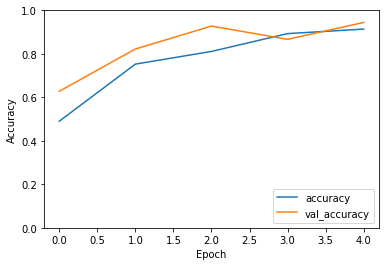

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_ds, verbose=2)

#TERCER MODELO

In [ ]:
model = tf.keras.Sequential([
     tf.keras.layers.Conv2D(32, (3, 3),
                           activation='relu',
                           input_shape=(240, 240, 3)),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'), 
    tf.keras.layers.Dense(64, activation = 'relu'), 
    tf.keras.layers.Dense(3), 
]) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 119, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 453152)            0         
                                                                 
 dense (Dense)               (None, 128)               58003584  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                        

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
23/23 [==============================] - 5s 75ms/step - loss: 1411.7252 - accuracy: 0.4306 - val_loss: 10.0982 - val_accuracy: 0.8222
Epoch 2/10
23/23 [==============================] - 2s 59ms/step - loss: 7.1769 - accuracy: 0.8597 - val_loss: 2.6395 - val_accuracy: 0.9056
Epoch 3/10
23/23 [==============================] - 2s 60ms/step - loss: 0.7470 - accuracy: 0.9597 - val_loss: 1.8621 - val_accuracy: 0.9222
Epoch 4/10
23/23 [==============================] - 1s 58ms/step - loss: 0.1625 - accuracy: 0.9875 - val_loss: 1.1528 - val_accuracy: 0.9278
Epoch 5/10
23/23 [==============================] - 2s 59ms/step - loss: 0.0884 - accuracy: 0.9917 - val_loss: 0.6713 - val_accuracy: 0.9278
Epoch 6/10
23/23 [==============================] - 1s 58ms/step - loss: 0.0374 - accuracy: 0.9958 - val_loss: 2.2017 - val_accuracy: 0.9222
Epoch 7/10
23/23 [==============================] - 1s 58ms/step - loss: 0.0361 - accuracy: 0.9986 - val_loss: 1.0476 - val_accuracy: 0.9389
Epoch 8/1

6/6 - 0s - loss: 0.9460 - accuracy: 0.9278 - 229ms/epoch - 38ms/step


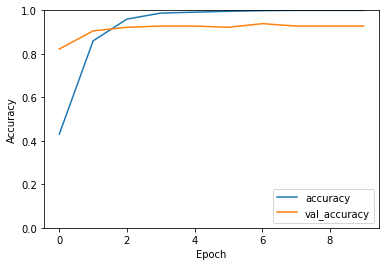

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_ds, verbose=2)

#CUARTO MODELO

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3),
                           activation='relu',
                           input_shape=(240, 240, 3)),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.33),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.33),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.33),
    tf.keras.layers.Dense(3), 
]) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 119, 64)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 906304)            0         
                                                                 
 dropout (Dropout)           (None, 906304)            0         
                                                                 
 dense (Dense)               (None, 128)               116007040 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
23/23 [==============================] - 9s 154ms/step - loss: 949.5362 - accuracy: 0.5306 - val_loss: 12.0725 - val_accuracy: 0.6389
Epoch 2/10
23/23 [==============================] - 2s 102ms/step - loss: 7.7185 - accuracy: 0.6778 - val_loss: 0.8619 - val_accuracy: 0.8056
Epoch 3/10
23/23 [==============================] - 2s 101ms/step - loss: 1.8127 - accuracy: 0.7653 - val_loss: 0.6568 - val_accuracy: 0.8333
Epoch 4/10
23/23 [==============================] - 2s 101ms/step - loss: 0.9659 - accuracy: 0.8069 - val_loss: 0.5767 - val_accuracy: 0.8556
Epoch 5/10
23/23 [==============================] - 2s 101ms/step - loss: 0.5200 - accuracy: 0.8736 - val_loss: 0.4808 - val_accuracy: 0.8500
Epoch 6/10
23/23 [==============================] - 2s 101ms/step - loss: 0.4782 - accuracy: 0.8875 - val_loss: 0.4749 - val_accuracy: 0.8667
Epoch 7/10
23/23 [==============================] - 2s 101ms/step - loss: 0.3175 - accuracy: 0.9083 - val_loss: 0.4146 - val_accuracy: 0.8722
Epo

6/6 - 0s - loss: 0.4818 - accuracy: 0.8944 - 292ms/epoch - 49ms/step


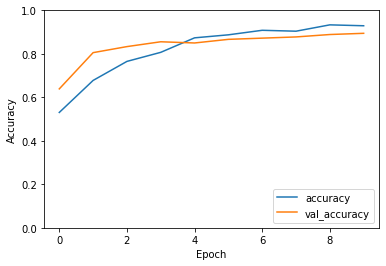

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_ds, verbose=2)

#MODELO EN USO

In [ ]:
model.save('/content/model')

In [ ]:
model_fetched = tf.keras.models.load_model('/content/model')

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

CLASSES = ['FLAT-TIRE', 'FULL-TIRE', 'NO-TIRE']
imgs = files.upload()

for fn in imgs.keys():
    path = '/content/' + fn
    img = image.load_img(path, target_size=(240, 240))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    max_idx = classes.argmax()
    print('CLASS:', CLASSES[max_idx])

Saving 014-red-s10-drag-truck.jpg to 014-red-s10-drag-truck.jpg
[304.4382  258.26517 669.9421 ]
CLASS: NO-TIRE


In [ ]:
#Remove folder
import shutil
shutil.rmtree('/content/Images')